Analyzing papers about "embeddings" from CS Arxiv over the past 5 years to see if their occurrence has increased using [ArXiv API Wraper](https://pypi.org/project/arxiv/)

In [1]:
%matplotlib inline
%load_ext jupyter_black

import requests
import numpy as np
import pylab
import matplotlib.pyplot as plt
import pandas as pd

import tqdm

from arxiv import SortCriterion, Search, SortOrder
import typing
from collections import defaultdict

In [8]:
# Arxiv API Search
embedding_search = Search(
    query="embeddings",
    max_results=float("inf"),  # limit of 300k results from the API total
)

In [9]:
# Preparing results for Pandas import
embedding_dict = defaultdict(list, title=[], date=[], category=[])

results = embedding_search.results()

for result in tqdm.tqdm(results):
    embedding_dict["title"].append(result.title)
    embedding_dict["date"].append(result.published)
    embedding_dict["category"].append(result.primary_category)

16200it [12:42, 21.24it/s]


UnexpectedEmptyPageError: Page of results was unexpectedly empty (http://export.arxiv.org/api/query?search_query=embeddings&id_list=&sortBy=relevance&sortOrder=descending&start=16200&max_results=100)

In [10]:
# Get default dict into Pandas for graphing
embedding_df = pd.DataFrame.from_dict(embedding_dict)

In [11]:
embedding_df.to_csv("embeddings.csv", index=False)

In [13]:
embedding_df = pd.read_csv("embeddings.csv")

In [14]:
embedding_df

,title,date,category
0,Frustratingly Easy Meta-Embedding -- Computing...,2018-04-14 18:30:01+00:00,cs.CL
1,Learning Meta-Embeddings by Using Ensembles of...,2015-08-18 09:29:22+00:00,cs.CL
2,Discrete Word Embedding for Logical Natural La...,2020-08-26 16:15:18+00:00,cs.CL
3,Hash Embeddings for Efficient Word Representat...,2017-09-12 16:13:10+00:00,cs.CL
4,Gender Bias in Meta-Embeddings,2022-05-19 21:20:47+00:00,cs.CL
...,...,...,...
16195,ArchNet: Data Hiding Model in Distributed Mach...,2020-04-23 04:59:05+00:00,cs.LG
16196,On the Role of Visual Cues in Audiovisual Spee...,2020-04-25 01:00:03+00:00,cs.LG
16197,Multilayer Structures of Graphene and Pt Nanop...,2020-04-25 10:35:45+00:00,physics.app-ph
16198,Gravitational couplings in ${\cal N}=2$ hetero...,2020-04-25 13:06:51+00:00,hep-th


In [22]:
# Only CS papers (maybe filter further to IR?)
embedding_df = embedding_df[embedding_df["category"].str.startswith("cs")]
# Compress to months
embedding_df["created_month"] = pd.to_datetime(embedding_df["date"]).dt.strftime(
    "%Y-%m"
)
embedding_df

,title,date,category,created_month
0,Frustratingly Easy Meta-Embedding -- Computing...,2018-04-14 18:30:01+00:00,cs.CL,2018-04
1,Learning Meta-Embeddings by Using Ensembles of...,2015-08-18 09:29:22+00:00,cs.CL,2015-08
2,Discrete Word Embedding for Logical Natural La...,2020-08-26 16:15:18+00:00,cs.CL,2020-08
3,Hash Embeddings for Efficient Word Representat...,2017-09-12 16:13:10+00:00,cs.CL,2017-09
4,Gender Bias in Meta-Embeddings,2022-05-19 21:20:47+00:00,cs.CL,2022-05
...,...,...,...,...
16193,A novel embedded min-max approach for feature ...,2020-04-21 09:40:38+00:00,cs.LG,2020-04
16194,TAEN: Temporal Aware Embedding Network for Few...,2020-04-21 16:32:10+00:00,cs.CV,2020-04
16195,ArchNet: Data Hiding Model in Distributed Mach...,2020-04-23 04:59:05+00:00,cs.LG,2020-04
16196,On the Role of Visual Cues in Audiovisual Spee...,2020-04-25 01:00:03+00:00,cs.LG,2020-04


/var/folders/n8/dpr0sw1x2mdcxbv9rthvwz500000gp/T/ipykernel_34593/3076347316.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


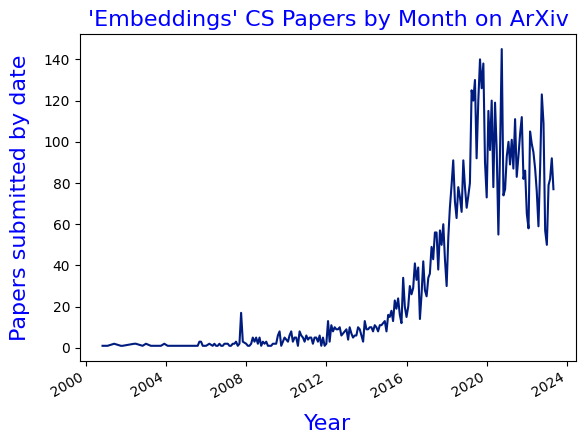

In [24]:
import matplotlib.dates as mdates

plt.style.use("seaborn-dark-palette")

font = {
    "family": "sans-serif",
    "color": "blue",
    "weight": "normal",
    "size": 16,
}

histo = embedding_df.groupby("created_month").size().reset_index()
histo_filtered = histo
histo_filtered.columns = ["created_month", "published_articles"]

histo_filtered["created_month"] = pd.to_datetime(histo_filtered["created_month"])
histo_filtered

fig, ax = plt.subplots()
histo_filtered.plot(x="created_month", x_compat=True, ax=ax)


plt.title("'Embeddings' CS Papers by Month on ArXiv", fontdict=font)
plt.ylabel("Papers submitted by date", labelpad=10, fontdict=font)
plt.xlabel("Year", labelpad=10, fontdict=font)

ax.get_legend().remove()

plt.show()